### Exercise 5

<div class="alert-success">
    
1. Get a polygons map of the lowest administrative unit possible.

In [ ]:
# Distribución espacial de los local administration
import geopandas as gpd

dkMapaDistLink="https://github.com/Guille20241/CDE/raw/main/maps/whosonfirst-data-admin-dk-latest/whosonfirst-data-admin-dk-localadmin-polygon.shp"

mapdis=gpd.read_file(dkMapaDistLink)
mapdis.rename(columns={'name': 'Municipalidad'}, inplace=True)

mapdis.shape

(99, 56)

2. Get a table of variables for those units. At least 3 numerical variables.

AND

3. Preprocess both tables and get them ready for merging.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)

# VARIABLE CRÍMENES
dkDataLink="https://github.com/Guille20241/CDE/raw/main/data/reportedcriminaloffencesbyregionandtime2023Q.xlsx"
datadis_crimen=pd.read_excel(dkDataLink, dtype={'Ubigeo': object})
datadis_crimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Reported criminal offences by region and time  108 non-null    object
 1   Unnamed: 1                                     107 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [ ]:
#cambiamos el nombre de las columnas
datadis_crimen = datadis_crimen.rename(columns={datadis_crimen.columns[0]: 'Municipalidad', datadis_crimen.columns[1]: 'crimenes_reportados_2023Q3'})

In [ ]:
# dropeamos lo que no nos sirve y reseteamos los índices
datadis_crimen.drop([0, 1, 2], axis= 0, inplace=True)
datadis_crimen.reset_index(drop=True, inplace = True)

In [ ]:
datadis_crimen

Municipalidad  \
0                                   Region Hovedstaden   
1                                           Copenhagen   
2                                        Frederiksberg   
3                                               Dragør   
4                                               Tårnby   
..                                                 ...   
102                                    Vesthimmerlands   
103                                            Aalborg   
104                               Unknown municipality   
105                                                NaN   
106  The provisions of the Danish Criminal Code reg...   

    crimenes_reportados_2023Q3  
0                        44093  
1                        22195  
2                         1862  
3                          140  
4                         1839  
..                         ...  
102                       1175  
103                       3783  
104                       9511  
105                        NaN  
106                        NaN  

[107 rows x 2 columns]

In [ ]:
#VARIABLE EXPECTANCIA DE VIDA
dkDataLink="https://github.com/Guille20241/CDE/raw/main/data/Lifeexpentancyfornewbornbabiesbysex%2Cregionandtime.xlsx"
datadis_vida=pd.read_excel(dkDataLink, dtype={'Ubigeo': object})
#datadis_vida.head()

In [ ]:
#datadis_vida[~datadis_vida[datadis_vida.columns[0]].isna()] #ubicamos el tercer False

In [ ]:
#ubicamos de 3 a 101
datadis_vida = datadis_vida.drop(datadis_vida.columns[0], axis = 1)
datadis_vida = datadis_vida[3:101]
datadis_vida.reset_index(drop=True, inplace = True)

datadis_vida.drop(datadis_vida.columns[1 : len(datadis_vida.columns)-1], axis= 1, inplace=True)
datadis_vida = datadis_vida.rename(columns={datadis_vida.columns[0]: 'Municipalidad', datadis_vida.columns[1]: 'Life_excpectancy_2023'})
datadis_vida

Municipalidad Life_excpectancy_2023
0        Copenhagen                  80.4
1     Frederiksberg                  82.3
2            Dragør                  82.5
3            Tårnby                  80.9
4       Albertslund                  81.4
..              ...                   ...
93    Mariagerfjord                  81.7
94            Morsø                  80.7
95           Rebild                  81.9
96          Thisted                  80.5
97  Vesthimmerlands                  80.9

[98 rows x 2 columns]

In [ ]:
# VARIABLE POBLACIÓN

dkDataLink="https://github.com/Guille20241/CDE/raw/main/data/municipalitiespopulation.xlsx"
datadis_pob=pd.read_excel(dkDataLink, dtype={'Ubigeo': object})
datadis_pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LAU-1                  99 non-null     object
 1   Municipality           98 non-null     object
 2   Administrative Center  98 non-null     object
 3   Total Area             99 non-null     object
 4   Population             99 non-null     object
 5   Region                 98 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [ ]:
#solo necesido municipalidad y poblacion
datadis_pob = datadis_pob[['Municipality', 'Population']][1:]
datadis_pob.reset_index(drop=True, inplace = True)
datadis_pob.rename(columns={'Municipality': 'Municipalidad', 'Population':'Poblacion'}, inplace=True)
datadis_pob

Municipalidad Poblacion
0     Copenhagen    549050
1         Aarhus    314545
2        Aalborg    201142
3         Odense    191610
4        Esbjerg    115112
..           ...       ...
93     Langeland     13094
94           Ærø      6636
95         Samsø      3889
96          Fanø      3251
97          Læsø      1897

[98 rows x 2 columns]

4. Do the merging, making the changes needed so that you keep the most columns.
    
    
</div>

In [ ]:
set(datadis_crimen.Municipalidad) - set(datadis_vida.Municipalidad)  - set(datadis_pob.Municipalidad)
#estas no las necesitamos porque están a otro nivel
#como todo es de la misma fuente, tenemos la suerte que no tenemos que utilizar fuzzy

{'Region Hovedstaden',
 'Region Midtjylland',
 'Region Nordjylland',
 'Region Sjælland',
 'Region Syddanmark',
 'The provisions of the Danish Criminal Code regarding sexual offences went through essential amendments taking effect from 1 July 2013. The amendments resulted in e.g. more categories of sexual offences than previously being placed under the provisions about rape (section 216). See more in the documentation of statistics, in the chapter Comparability: http://www.dst.dk/declarations//c1ac7749-1e15-4d3a-8ed0-fb2d26a9fe93 ',
 'Unknown municipality',
 nan}

In [ ]:
# HACEMOS UN MERGE PARA TENER LAS 3 VARIABLES
df1 = pd.merge(datadis_crimen, datadis_vida, on='Municipalidad', how='inner')
datadis_merged = pd.merge(df1, datadis_pob, on='Municipalidad', how='inner')
datadis_merged

Municipalidad crimenes_reportados_2023Q3 Life_excpectancy_2023 Poblacion
0      Copenhagen                      22195                  80.4    549050
1   Frederiksberg                       1862                  82.3    100215
2          Dragør                        140                  82.5     13692
3          Tårnby                       1839                  80.9     41151
4     Albertslund                        603                  81.4     27864
..            ...                        ...                   ...       ...
90           Læsø                         12                    ..      1897
91  Mariagerfjord                        467                  81.7     42429
92          Morsø                        141                  80.7     21474
93         Rebild                        252                  81.9     28911
94        Thisted                        428                  80.5     44908

[95 rows x 4 columns]

In [ ]:
# HAREMOS UN MERGE FINAL CON EL MAPDIS

mapDataDis = pd.merge(datadis_merged, mapdis, on='Municipalidad', how='inner')
mapDataDis = mapDataDis[['Municipalidad', 'geometry']]
mapDataDis.info()
#vemos que hay pocos registros, en este caso vale la pena hacer un fuzzy merging

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Municipalidad  66 non-null     object  
 1   geometry       66 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.2+ KB


In [ ]:
pip install thefuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.9 MB/s eta 0:00:00


In [ ]:
from thefuzz import process
#cuales no coinciden
nomatch = set(datadis_merged.Municipalidad)- set(mapdis.Municipalidad)
# ver coincidencias
[(dis,process.extractOne(dis, mapdis.Municipalidad)) for dis in sorted(nomatch)]

[('Allerød', ('Allerod', 92, 81)),
 ('Brøndby', ('Brondby', 92, 96)),
 ('Brønderslev', ('Bronderslev', 95, 16)),
 ('Dragør', ('Dragor', 91, 55)),
 ('Fanø', ('Fano', 86, 58)),
 ('Furesø', ('Fureso', 91, 56)),
 ('Halsnæs', ('Halsnaes', 86, 10)),
 ('Helsingør', ('Helsingor', 94, 35)),
 ('Hillerød', ('Hillerod', 93, 67)),
 ('Hjørring', ('Hjorring', 93, 97)),
 ('Holbæk', ('Holbaek', 83, 0)),
 ('Høje-Taastrup', ('Hoje-Taastrup', 96, 85)),
 ('Hørsholm', ('Horsholm', 93, 69)),
 ('Ishøj', ('Ishoj', 89, 94)),
 ('Køge', ('Koge', 86, 41)),
 ('Lyngby-Taarbæk', ('Lyngby-Taarbaek', 93, 3)),
 ('Læsø', ('Halsnaes', 90, 10)),
 ('Morsø', ('Morso', 89, 32)),
 ('Næstved', ('Naestved', 86, 20)),
 ('Ringkøbing-Skjern', ('Ringkobing-Skjern', 97, 38)),
 ('Rødovre', ('Rodovre', 92, 86)),
 ('Samsø', ('Samso', 89, 8)),
 ('Solrød', ('Solrod', 91, 47)),
 ('Sorø', ('Soro', 86, 73)),
 ('Sønderborg', ('Sonderborg', 95, 51)),
 ('Tårnby', ('Tarnby', 91, 28)),
 ('Tønder', ('Tonder', 91, 70)),
 ('Vallensbæk', ('Vallensbae

In [ ]:
changes={dis:process.extractOne(dis,mapdis.Municipalidad)[0] for dis in sorted(nomatch)}
changes

{'Allerød': 'Allerod',
 'Brøndby': 'Brondby',
 'Brønderslev': 'Bronderslev',
 'Dragør': 'Dragor',
 'Fanø': 'Fano',
 'Furesø': 'Fureso',
 'Halsnæs': 'Halsnaes',
 'Helsingør': 'Helsingor',
 'Hillerød': 'Hillerod',
 'Hjørring': 'Hjorring',
 'Holbæk': 'Holbaek',
 'Høje-Taastrup': 'Hoje-Taastrup',
 'Hørsholm': 'Horsholm',
 'Ishøj': 'Ishoj',
 'Køge': 'Koge',
 'Lyngby-Taarbæk': 'Lyngby-Taarbaek',
 'Læsø': 'Halsnaes',
 'Morsø': 'Morso',
 'Næstved': 'Naestved',
 'Ringkøbing-Skjern': 'Ringkobing-Skjern',
 'Rødovre': 'Rodovre',
 'Samsø': 'Samso',
 'Solrød': 'Solrod',
 'Sorø': 'Soro',
 'Sønderborg': 'Sonderborg',
 'Tårnby': 'Tarnby',
 'Tønder': 'Tonder',
 'Vallensbæk': 'Vallensbaek',
 'Ærø': 'Herning'}

In [ ]:
datadis_merged.replace({'Municipalidad':changes},inplace=True)

In [ ]:
mapDataDis = pd.merge(datadis_merged, mapdis[['Municipalidad', 'geometry']], on='Municipalidad', how='inner')

In [ ]:
import numpy as np


mapDataDis.crimenes_reportados_2023Q3 = mapDataDis.crimenes_reportados_2023Q3.astype(float)
mapDataDis.Life_excpectancy_2023.replace('..', np.nan, inplace=True)
mapDataDis.Life_excpectancy_2023 = mapDataDis.Life_excpectancy_2023.astype(float)
mapDataDis.Poblacion = mapDataDis.Poblacion.astype(int)
mapDataDis = gpd.GeoDataFrame(mapDataDis, geometry='geometry')
#MERGE FINAL:
mapDataDis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Municipalidad               95 non-null     object  
 1   crimenes_reportados_2023Q3  95 non-null     float64 
 2   Life_excpectancy_2023       91 non-null     float64 
 3   Poblacion                   95 non-null     int64   
 4   geometry                    95 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 3.8+ KB


### Exercise 6

<div class="alert-success">
        
Compute the neighbors of the capital of your country. Plot the results for each of the options.
    
</div>

In [ ]:
pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00


In [ ]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(mapDataDis,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 12 islands with ids: 0, 1, 29, 33, 37, 50, 54, 59, 75, 86, 88, 92.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
# queen
w_queen = Queen.from_dataframe(mapDataDis,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 12 islands with ids: 0, 1, 29, 33, 37, 50, 54, 59, 75, 86, 88, 92.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
pip install folium

In [ ]:
pip install matplotlib

In [ ]:
pip install mapclassify

In [ ]:
mapDataDis.iloc[w_queen.islands,:].explore()

In [ ]:
#hay islas, usaremos k vecinos próximos para aproximarnos
w_knn8 = KNN.from_dataframe(mapDataDis, k=28)
w_knn8.islands

[]

<Axes: >

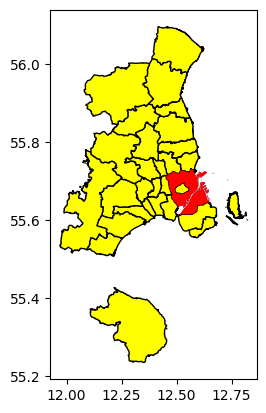

In [ ]:
# vemos el vecino, solo funciona bien con KNN
base = mapDataDis[mapDataDis.Municipalidad=="Copenhagen"].plot()
mapDataDis.iloc[w_knn8.neighbors[0] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
mapDataDis.head(1).plot(ax=base,facecolor="red")

### Exercise 7

<div class="alert-success">
    
1. Compute the Moran's coefficient for **one** of your three  numeric variables.

In [ ]:
pip install PySAl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from esda.moran import Moran

moranCrime = Moran(mapDataDis.crimenes_reportados_2023Q3, w_knn8)
moranCrime.I,moranCrime.p_sim

(-0.013725729742002828, 0.408)

2. Make a scatter plot for each variable.
    
</div>

(-0.25, 0.25)

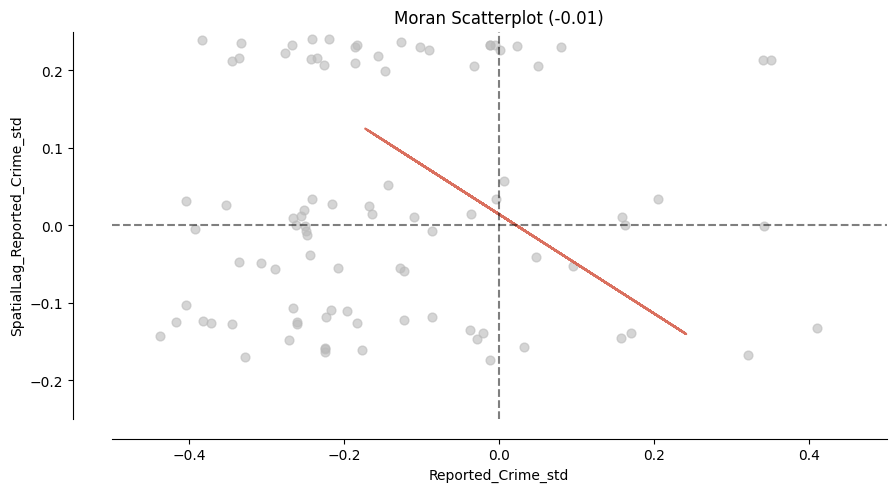

In [ ]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

moran_scatterplot(moranCrime, aspect_equal=True, ax=ax)

ax.set_xlabel('Reported_Crime_std')
ax.set_ylabel('SpatialLag_Reported_Crime_std')

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.25, 0.25)

(-0.25, 0.25)

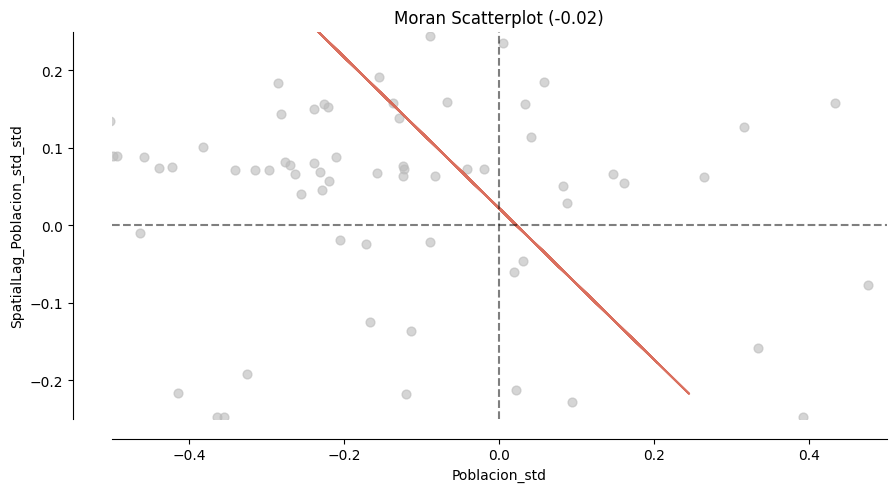

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

moran_scatterplot(Moran(mapDataDis.Poblacion, w_knn8), aspect_equal=True, ax=ax)

ax.set_xlabel('Poblacion_std')
ax.set_ylabel('SpatialLag_Poblacion_std_std')

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.25, 0.25)

Text(0, 0.5, 'SpatialLag_Life_excpectancy_std')

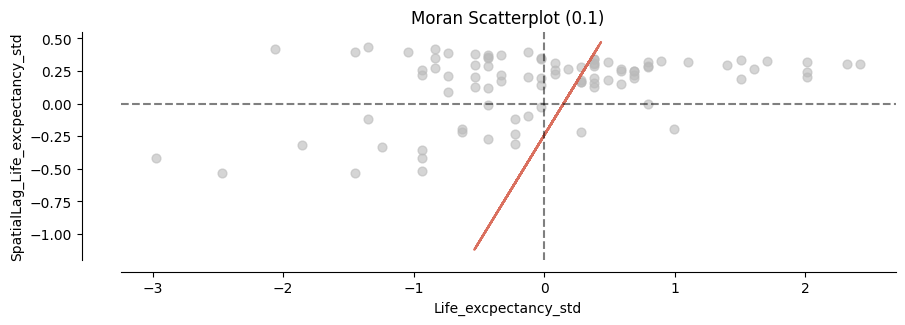

In [ ]:
# para esta variable hay nulos y tenemos que manejarlos
aux = mapDataDis.dropna(subset=['Life_excpectancy_2023'])
w_knn8_aux = KNN.from_dataframe(aux, k=28)
Moran(aux.Life_excpectancy_2023, w_knn8_aux).I, Moran(aux.Life_excpectancy_2023, w_knn8_aux).p_sim

fig, ax = plt.subplots(figsize=(10, 6))

moran_scatterplot(Moran(aux.Life_excpectancy_2023, w_knn8_aux), aspect_equal=True, ax=ax)

ax.set_xlabel('Life_excpectancy_std')
ax.set_ylabel('SpatialLag_Life_excpectancy_std')

#ax.set_xlim(-4, 4)
#ax.set_ylim(-1.5, 1.5)

### Exercise 8

<div class="alert-success">
    
1. Compute the Local Moran for the variables in your data that have significant spatial correlation.

In [ ]:
# tenemos que calcular a LISA

from esda.moran import Moran_Local
lisaLE = Moran_Local(y=aux['Life_excpectancy_2023'], w=w_knn8_aux,seed=2023)
#lisaLE es lo que nos piden

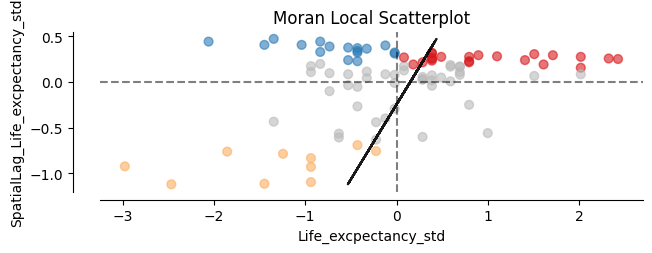

In [ ]:
fig, ax = moran_scatterplot(lisaLE,p=0.05)
ax.set_xlabel('Life_excpectancy_std')
ax.set_ylabel('SpatialLag_Life_excpectancy_std');

    
2. Create a new column for each of those variables, with a label ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

In [ ]:
aux['Life_Expectancy_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaLE.q,lisaLE.p_sim)  ]
aux['Life_Expectancy_quadrant'].value_counts()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Life_Expectancy_quadrant
0    42
1    22
2    17
3    10
Name: count, dtype: int64

In [ ]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
aux['Life_Expectancy_quadrant_names']=[labels[i] for i in aux['Life_Expectancy_quadrant']]
aux.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Municipalidad  crimenes_reportados_2023Q3  Life_excpectancy_2023  \
0     Copenhagen                     22195.0                   80.4   
1  Frederiksberg                      1862.0                   82.3   
2         Dragor                       140.0                   82.5   
3         Tarnby                      1839.0                   80.9   
4    Albertslund                       603.0                   81.4   

   Poblacion                                           geometry  \
0     549050  MULTIPOLYGON (((12.73416 55.70339, 12.73417 55...   
1     100215  POLYGON ((12.52731 55.69556, 12.52732 55.69555...   
2      13692  MULTIPOLYGON (((12.56371 55.57581, 12.56371 55...   
3      41151  MULTIPOLYGON (((12.73547 55.63006, 12.73561 55...   
4      27864  POLYGON ((12.37471 55.66018, 12.37436 55.66014...   

   Life_Expectancy_quadrant Life_Expectancy_quadrant_names  
0                         2                  2 coldOutlier  
1                         1                      1 hotSpot  
2                         1                      1 hotSpot  
3                         2                  2 coldOutlier  
4                         2                  2 coldOutlier


3. Prepare a map for each of the variables analyzed, showing the spots and outliers.

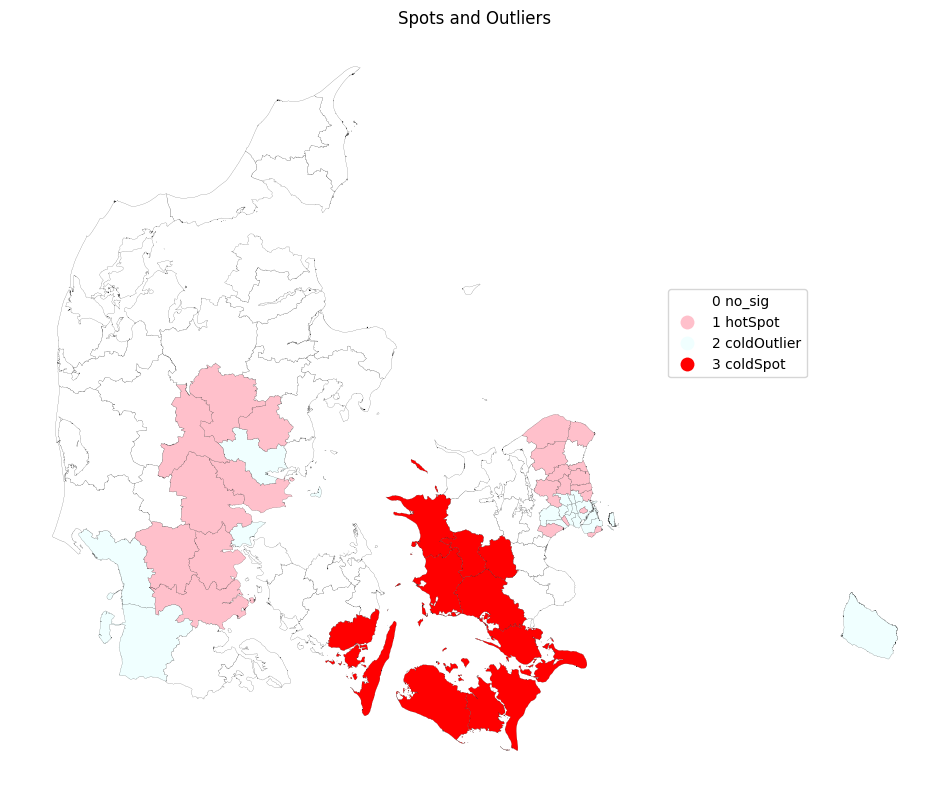

In [ ]:
# custom colors
from matplotlib import colors
myColMap = colors.ListedColormap([ 'white', 'pink', 'cyan', 'azure','red'])

# Set up figure and ax
f, ax = plt.subplots(1, figsize=(12,12))
# Plot unique values choropleth including
# a legend and with no boundary lines

plt.title('Spots and Outliers')

aux.plot(column='Life_Expectancy_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

### Exercise 9

<div class="alert-success">
    
Use your three variables to carry out the cluster/regional analysis.
    
</div>

In [ ]:
selected_variables = ['Life_excpectancy_2023',
                     'crimenes_reportados_2023Q3',
                     'Poblacion']
aux[selected_variables].corr()

Life_excpectancy_2023  crimenes_reportados_2023Q3  \
Life_excpectancy_2023                    1.000000                   -0.087615   
crimenes_reportados_2023Q3              -0.087615                    1.000000   
Poblacion                               -0.056632                    0.954596   

                            Poblacion  
Life_excpectancy_2023       -0.056632  
crimenes_reportados_2023Q3   0.954596  
Poblacion                    1.000000

In [ ]:
# normalizamos la data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(aux[selected_variables])

# new names
selected_variables_new_std=[s+'_std' for s in selected_variables]

# add colunms
aux[selected_variables_new_std]=normalized_data

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Clustering convencional

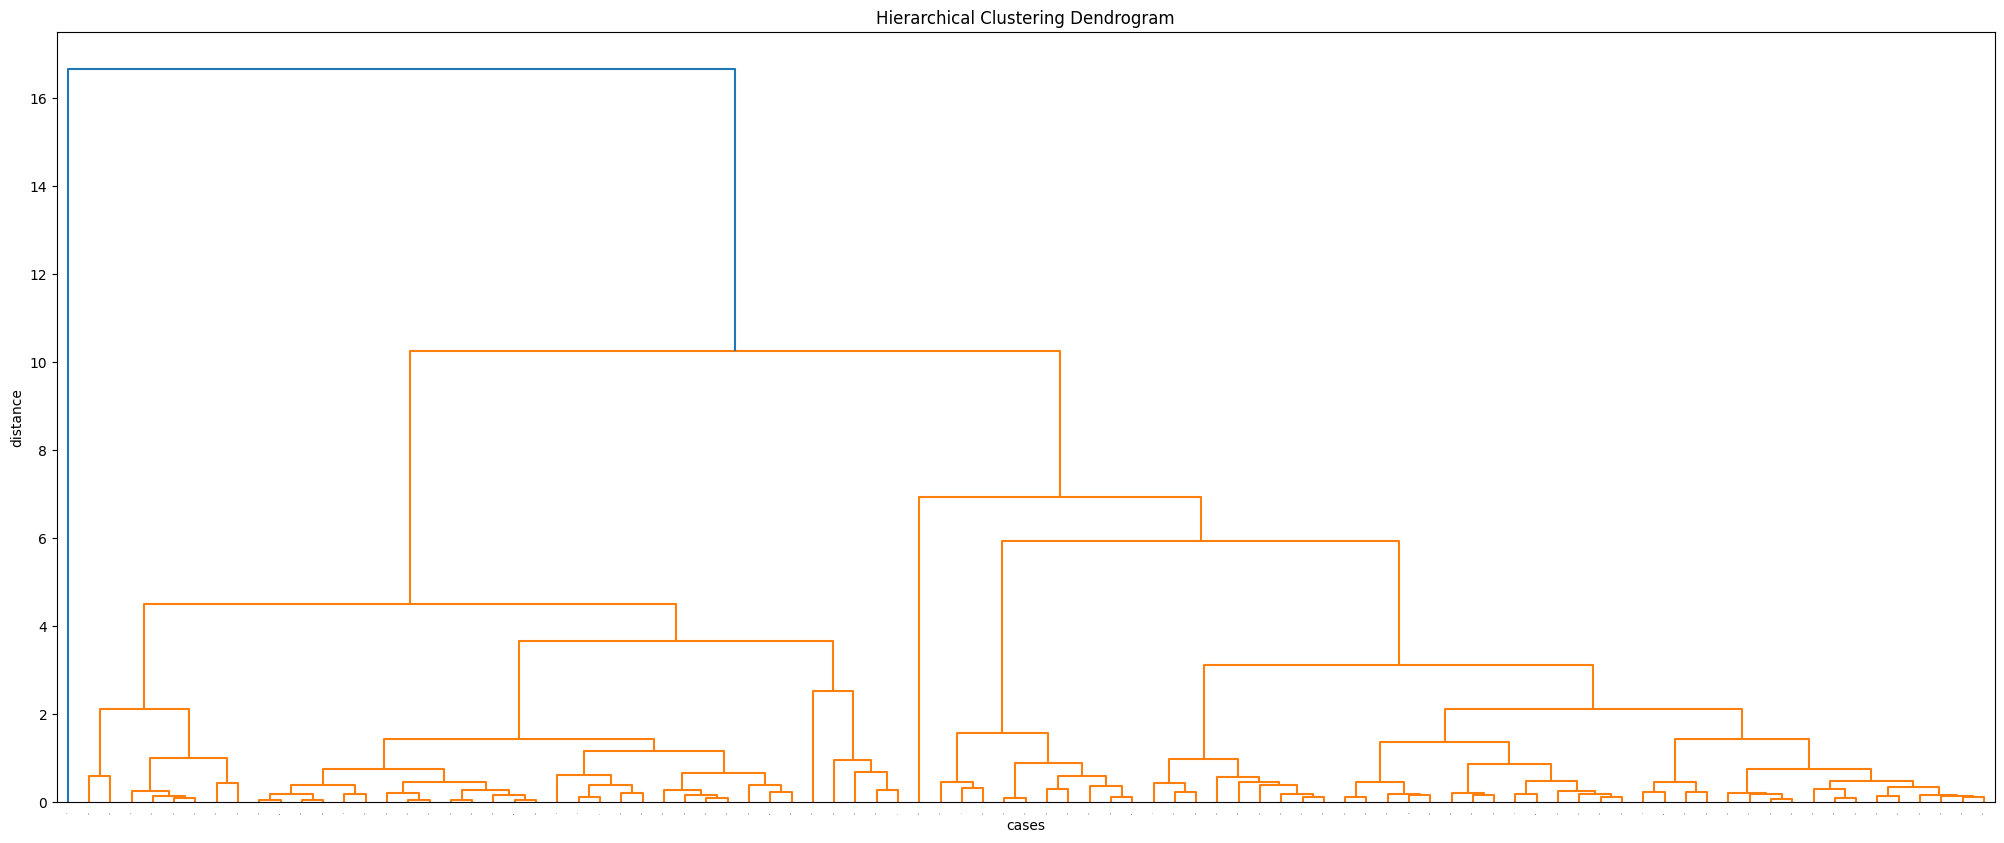

In [ ]:
from scipy.cluster import hierarchy as hc


Z = hc.linkage(aux[selected_variables_new_std], 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cases')
plt.ylabel('distance')
hc.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agnes
import numpy as np

np.random.seed(42)# Set seed for reproducibility

# El dendograma recomienda 1 grupo (que sucede por la baja correlación), intentemos con 4
model = agnes(linkage="ward", n_clusters=4).fit(aux[selected_variables_new_std])

# Assign labels to main data table
aux["hc_ag4"] = model.labels_

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


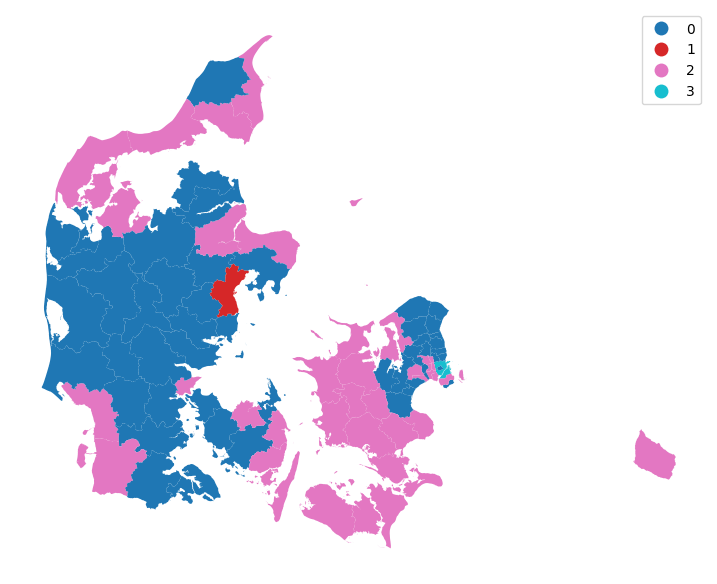

In [ ]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
aux.plot(
    column="hc_ag4", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

Clustering Espacial

In [ ]:
# CLUSTERING ESPACIAL

#usamos de frente k vecinos próximos con k = 28
from sklearn.cluster import AgglomerativeClustering as agnes

model_knn28 = agnes(linkage="ward",
                    n_clusters=4,
                    connectivity=w_knn8_aux.sparse).fit(aux[selected_variables_new_std])
# Fit algorithm to the data
aux["hc_ag4_wKNN28"] = model_knn28.labels_

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


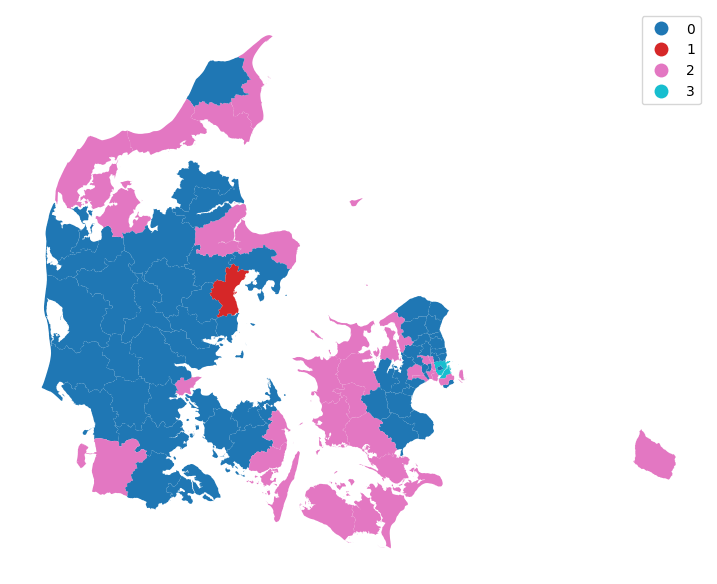

In [ ]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
aux.plot(
    column="hc_ag4_wKNN28",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

En general, vemos que la clasificación es muy similar. Evaluemos sus métricas de rendimiento usando el "Compactness" (Cuanto más cercano a 0 mejor).

In [ ]:
from esda import shape as shapestats
results={}
for cluster_type in ("hc_ag4_wKNN28", "hc_ag4"):
    # compute the region polygons using a dissolve
    # el CRS de Dinamarca es 25832 !!
    regions = aux[[cluster_type, "geometry"]].to_crs(25832).dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = shapestats.isoperimetric_quotient(regions)
    # cast to a dataframe
    result = {cluster_type:ipqs}
    results.update(result)
# stack the series together along columns
pd.DataFrame(results)

hc_ag4_wKNN28    hc_ag4
0       0.014979  0.014580
1       0.164054  0.164054
2       0.006440  0.006302
3       0.041339  0.041339

Ahora usaremos que tan bueno es el ajuste del modelo.

In [ ]:
from sklearn import metrics

fit_scores = []
for cluster_type in ("hc_ag4_wKNN28", "hc_ag4"):
    # compute the CH score
    ch_score = metrics.calinski_harabasz_score(
        # using scaled variables
        aux[selected_variables_new_std],
        # using these labels
        aux[cluster_type],
    )
    sil_score = metrics.silhouette_score(
        # using scaled variables
        aux[selected_variables_new_std],
        # using these labels
        aux[cluster_type],
    )
    # and append the cluster type with the CH score
    fit_scores.append((cluster_type, ch_score,sil_score))


# re-arrange the scores into a dataframe for display
pd.DataFrame(
    fit_scores, columns=["cluster type", "CH score", "SIL score"]
).set_index("cluster type")

CH score  SIL score
cluster type                        
hc_ag4_wKNN28  101.881809   0.368112
hc_ag4         108.222180   0.398315

Con esto último, podemos ver que en última instancia, el clustering convencional sigue siendo un poco mejor que el espacial !!!

### Exercise 10

<div class="alert-success">
    
Use your three variables to carry out regression analysis (conventional and spatial).
    
</div>

In [ ]:
pip install pysal

Coventional regression

In [ ]:
from pysal.model import spreg

dep_var_name=['crimenes_reportados_2023Q3']
ind_vars_names=['Poblacion','Life_excpectancy_2023']


ols_model = spreg.OLS(
    # Dependent variable
    aux[dep_var_name].values,
    # Independent variables
    aux[ind_vars_names].values,
    w=w_knn8_aux,
    spat_diag = True,
    moran=True,
    # Dependent variable name
    name_y=dep_var_name[0],
    # Independent variable name
    name_x=ind_vars_names)

print(ols_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :crimenes_reportados_2023Q3                Number of Observations:          91
Mean dependent var  :   1082.3626                Number of Variables   :           3
S.D. dependent var  :   2401.7287                Degrees of Freedom    :          88
R-squared           :      0.9124
Adjusted R-squared  :      0.9104
Sum squared residual: 4.54858e+07                F-statistic           :    458.1886
Sigma-square        :  516884.535                Prob(F-statistic)     :   2.977e-47
S.E. of regression  :     718.947                Log likelihood        :    -726.177
Sigma-square ML     :  499844.386                Akaike info criterion :    1458.354
S.E of regression ML:    706.9967                Schwarz criterion     :    1465.886

----------------------------------------------

Spatial Lag Regression

In [ ]:
morancrim = Moran(aux[dep_var_name], w_knn8_aux)
morancrim.I,morancrim.p_sim

(-0.01927877374249572, 0.253)

(-0.25, 0.25)

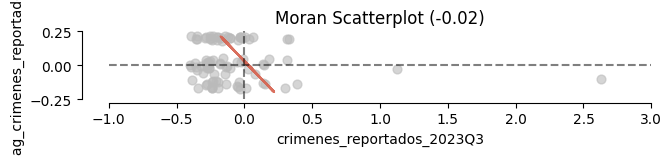

In [ ]:

fig, ax = moran_scatterplot(morancrim, aspect_equal=True)

ax.set_xlabel('crimenes_reportados_2023Q3')
ax.set_ylabel('SpatialLag_crimenes_reportados_2023Q3');
ax.set_xlim(-1, 3)
ax.set_ylim(-0.25, 0.25)

In [ ]:
lag_model = spreg.ML_Lag(
    # Dependent variable
    aux[dep_var_name].values,
    # Independent variables
    aux[ind_vars_names].values,
    w=w_knn8_aux,
    # Dependent variable name
    name_y=dep_var_name[0],
    # Independent variable name
    name_x=ind_vars_names
    )

print(lag_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :crimenes_reportados_2023Q3                Number of Observations:          91
Mean dependent var  :   1082.3626                Number of Variables   :           4
S.D. dependent var  :   2401.7287                Degrees of Freedom    :          87
Pseudo R-squared    :      0.9189
Spatial Pseudo R-squared:  0.8923
Log likelihood      :   -723.1477
Sigma-square ML     : 462627.3301                Akaike info criterion :    1454.295
S.E of regression   :    680.1671                Schwarz criterion     :    1464.339

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------

Spatial Error Regression

In [ ]:
moranError = Moran(ols_model.u, w_knn8_aux)
moranError.I,moranError.p_sim

(0.17569287923669474, 0.001)

(-1.5, 1.5)

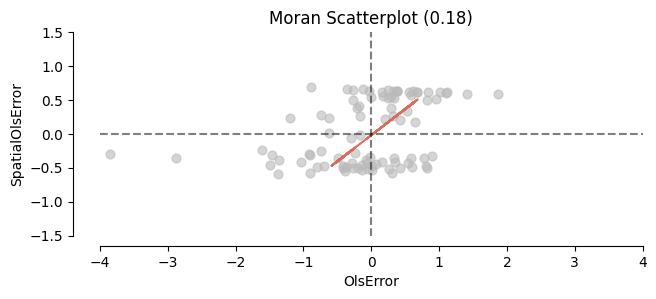

In [ ]:
fig, ax = moran_scatterplot(moranError, aspect_equal=True)
ax.set_xlabel('OlsError')
ax.set_ylabel('SpatialOlsError');
ax.set_xlim(-4, 4)
ax.set_ylim(-1.5, 1.5)

In [ ]:
err_model = spreg.ML_Error(
    # Dependent variable
    aux[dep_var_name].values,
    # Independent variables
    aux[ind_vars_names].values,
    w=w_knn8_aux,
    # Dependent variable name
    name_y=dep_var_name[0],
    # Independent variable name
    name_x=ind_vars_names
    )

print(err_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :crimenes_reportados_2023Q3                Number of Observations:          91
Mean dependent var  :   1082.3626                Number of Variables   :           3
S.D. dependent var  :   2401.7287                Degrees of Freedom    :          88
Pseudo R-squared    :      0.9123
Log likelihood      :   -720.5941
Sigma-square ML     : 434370.2042                Akaike info criterion :    1447.188
S.E of regression   :    659.0677                Schwarz criterion     :    1454.721

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


Spatial Error Regression, correcting heteroscedasticy.

In [ ]:
error_Het_model = spreg.GM_Error_Het(
    # Dependent variable
    aux[dep_var_name].values,
    # Independent variables
    aux[ind_vars_names].values,
    # Spatial weights matrix
    w=w_knn8_aux,
    # Dependent variable name
    name_y=dep_var_name[0],
    # Independent variable name
    name_x=ind_vars_names,
)
print(error_Het_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :crimenes_reportados_2023Q3                Number of Observations:          91
Mean dependent var  :   1082.3626                Number of Variables   :           3
S.D. dependent var  :   2401.7287                Degrees of Freedom    :          88
Pseudo R-squared    :      0.9122
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    -65505157462222264.00000    228966392503277184.00000        -0.28609         0.77481
           Poblaci